# Self-Driving Car 


## **Finding Lane Lines on the Road** 
***
Inputs: ?? Discuss what is the input

Outputs:?? and what is the output


In [ ]:
!pip install moviepy
!pip install Pygame

##### Input: Video (.mp4) of the road.
##### Output: Two Lane Lines equations. 
  For the lecture purposes we will display the lane lines on a video. 
  The output video will be: Original video with Lane Lines.

##### What we will learn today:
1. Display a video on Jupyter
2. Input a video and get frame by frame
3. Create a video from a series of frames
4. Save the video

For each frame:

5.  Get the edges (Canny)
6.  Remove unwanted parts of the image (too many edges)
7.  Get the lines (from edges - Hough lines)
8.  Formulate 2 lane lines
9.  Create an image with those 2 lines
10. Combine the orginal frame with the 2 lines

##### Note:
* In this notebook we will focus on the pipeline without going into details of each function
* There are 2 other notebooks: Canny and Hough to better understand those concepts
* First hour: Go through this notebook twice. This is sufficient for understanding the Lane Lines
* 45 minutes to understand Canny (extra material)
* 45 minutes to understand Hough Lines (extra material)
* 15-30 minutes talk about avanced Lane Lines detection

### Let's start

1. Display a video on Jupyter

In [ ]:
# Import HTML library to display the Video here in using HTML syntax
from IPython.display import HTML

In [ ]:
input_clip_name = "test_videos/solidWhiteRight.mp4"

HTML(f"""
<video width="960" height="540" controls>
  <source src="{input_clip_name}">
</video>
""")

In [ ]:
output_clip_name = "test_videos_output/solidWhiteRight_good.mp4"

HTML(f"""
<video width="960" height="540" controls>
  <source src="{output_clip_name}">
</video>
""")

2. Input a video and get frame by frame
3. Create a video from a series of frames
4. Save the video

* We already know that the video is a series of frames
* We need to loop on the video frame by frame. For each frame (image) - do somehitng on the image: process_image()):
* * First we will have a dummy function. Just adds a line (same line) on each frame
* Save the output video

* VideoFileClip(input_clip_name) [https://moviepy-tburrows13.readthedocs.io/en/improve-docs/ref/VideoClip/VideoFileClip.html]
* * Returns a video clip originating from a movie file.

* fl_image(self, image_func, apply_to=None)[https://zulko.github.io/moviepy/ref/VideoClip/VideoClip.html]
* * Modifies the images of a clip by replacing the frame get_frame(t) by another frame, image_func(get_frame(t))
* * fl_image: source: https://zulko.github.io/moviepy/_modules/moviepy/video/VideoClip.html#VideoClip.fl_image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# New lib for video editing
from moviepy.editor import VideoFileClip 

%matplotlib inline

In [ ]:
def process_image(image):
    # Dummy process image: The output you return should be a color image (3 channel) for processing video 
    # We will just add a line to the video
    

    return image

* VideoFileClip(input_clip_name) [https://moviepy-tburrows13.readthedocs.io/en/improve-docs/ref/VideoClip/VideoFileClip.html]


* fl_image(self, image_func, apply_to=None)[https://zulko.github.io/moviepy/ref/VideoClip/VideoClip.html]
* * Modifies the images of a clip by replacing the frame get_frame(t) by another frame, image_func(get_frame(t))
* * fl_image: source: https://zulko.github.io/moviepy/_modules/moviepy/video/VideoClip.html#VideoClip.fl_image


In [ ]:
input_clip_name = 'test_videos/solidWhiteRight.mp4'

output_clip_name = 'test_videos_output/solidWhiteRight.mp4'


In [ ]:
print(output_clip_name)

HTML(f"""
<video width="960" height="540" controls>
  <source src="{output_clip_name}">
</video>
""")

In [ ]:
# Let's modify the process_image to add some dynamic:

def process_image(image):
    # Dummy process image: The output you return should be a color image (3 channel) for processing video 
    # We will just add a line to the video

    return image

### Now the problem definition is changed from video to image
#### Input: image (RGB)
#### Output: image (RGB) with two RED lines indicating the lanes

For each frame:

5.   Get the edges (Canny)
6.   Remove unwanted parts of the image (too many edges)
7.   Get the lines (from edges - Hough lines)
8.   Formulate 2 lane lines
9.   Create an image with those 2 lines
10.   Combine the orginal frame with the 2 lines

In [2]:
# Let's see the pipeline on an image from HIGH level view (using helper functions - already done)
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
%run helpers.py

In [3]:
# Read the image:
# import matplotlib.pyplot as plt # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
%run helpers.py
image = cv2.imread('test_images/solidWhiteCurve.jpg') #read in
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 5.   Get the edges (Canny)

# 6.   Remove unwanted parts of the image (too many edges) ROI

# 7.   Get the lines (from edges - Hough lines)

# 8.   Formulate 2 lane lines

# 9.   Create an image with those 2 lines

# 10.   Combine the orginal frame with the 2 lines


# Now display the different steps

plt.show()

(25, 1, 4)
(2, 1, 4)


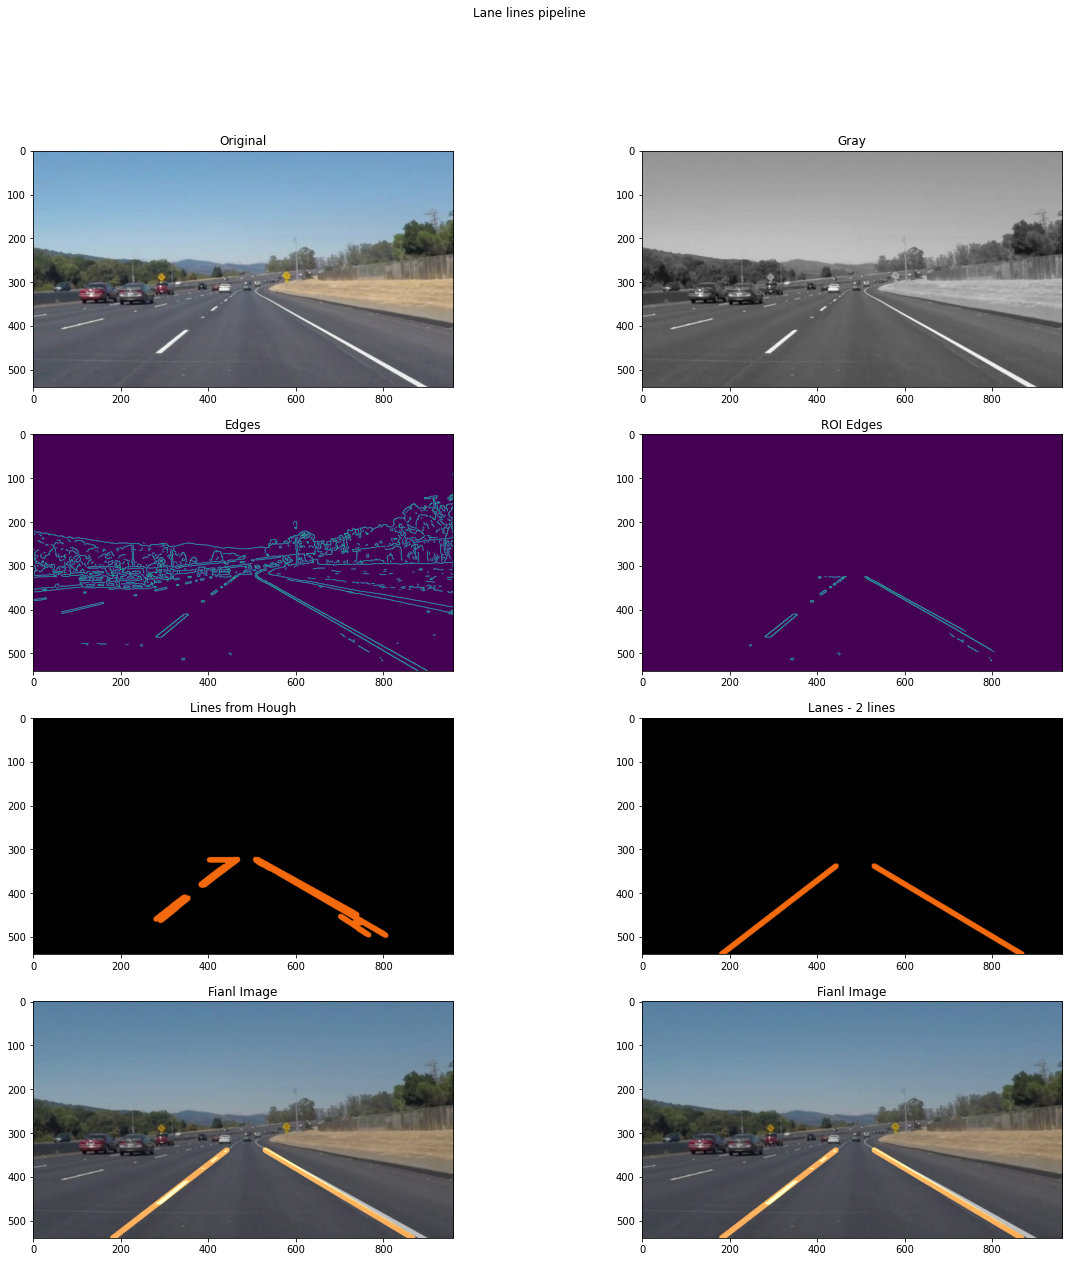

In [29]:
# Same pipeline again. More on Canny and Hough

CANNY_THRESHOLD_1 = 40  # try: 50 - 100      # Typical: 50
CANNY_THRESHOLD_2 = 50 # try: 100 - 200     # Typical: 150
def canny_edges(gray): # https://docs.opencv.org/3.4/d7/de1/tutorial_js_canny.html
    kernel_size = 5 #kernel size for Gaussian smoothing / blurring
    blur_gray= cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)#Gaussian smoothing / blurring

    # finding edges - Canny Edge detection (strong gradient between adjacent pixels)
    edges = cv2.Canny(blur_gray, CANNY_THRESHOLD_1, CANNY_THRESHOLD_2)
    return(edges)


#HOUGH LINES PARAMETERS
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok
MIN_VOTES = 10          # try: 10 - 50                  # Typical: 30
MIN_LINE_LEN = 5 
MAX_LINE_GAP = 25 

def hough_lines(img):
    lines = cv2.HoughLinesP(img, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
    return lines

# Read the image:
image = cv2.imread('test_images/solidWhiteCurve.jpg') #read in
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)#grayscale conversion

# 5.   Get the edges (Canny)
edges_img = canny_edges(gray_img)

# 6.   Remove unwanted parts of the image (too many edges) ROI
ROI_edges_img = helpers_masked_edges(edges_img)

# 7.   Get the lines (from edges - Hough lines)
lines = hough_lines(ROI_edges_img)
hough_lines_image = helpers_draw_lines(lines, ROI_edges_img)

# 8.   Formulate 2 lane lines
lanes = helpers_formulate_lanes(lines, ROI_edges_img)
print(lines.shape)
print(lanes.shape)

# 9.   Create an image with those 2 lines
lanes_image = helpers_draw_lines(lanes, ROI_edges_img)

#lanes_image = np.zeros((ROI_edges_img.shape[0], ROI_edges_img.shape[1], 3), dtype=np.uint8)
#draw_lines(lanes_image, lines)


# 10.   Combine the orginal frame with the 2 lines
final_image = cv2.addWeighted(image, 0.8, lanes_image, 1, 0) 


# Now disply the different steps
fig, (  (image_plt, gray_plt), 
        (edges_plt, ROI_edges_plt), 
        (hough_lines_image_plt, lanes_image_plt),
        (finale_image_plt, finale_image_plt_2)) = plt.subplots(4, 2, figsize=(20, 20))

image_plt.imshow(image)
image_plt.set_title('Original')
gray_plt.imshow(gray_img, cmap='gray')
gray_plt.set_title('Gray')

edges_plt.imshow(edges_img)
edges_plt.set_title('Edges')
ROI_edges_plt.imshow(ROI_edges_img)
ROI_edges_plt.set_title('ROI Edges')

hough_lines_image_plt.imshow(hough_lines_image)
hough_lines_image_plt.set_title('Lines from Hough')
lanes_image_plt.imshow(lanes_image)
lanes_image_plt.set_title('Lanes - 2 lines')

finale_image_plt.imshow(final_image)
finale_image_plt.set_title('Fianl Image')

finale_image_plt_2.imshow(final_image)
finale_image_plt_2.set_title('Fianl Image')

fig.suptitle('Lane lines pipeline')

plt.show()